In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
idea = 'vaccine data: deaths to covid by vaccination status on one graph vs two graphs'

In [4]:
vaccinedata = pd.read_csv("Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv")
#from https://covid.cdc.gov/covid-data-tracker/#rates-by-vaccine-status

In [5]:
vaccinedatadeaths = vaccinedata[vaccinedata['outcome'] == 'death']
vaccinedatadeaths#[vaccinedatadeaths['age_group'] == 'all_ages_adj']

,outcome,month,mmwr_week,week_date,age_group,vaccine_product,crude_vax_ir,crude_unvax_ir,crude_irr,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr
220,death,04 - APR,14,Apr 04-Apr 10,12-17,all_types,0.000000,0.027533,NaN,NaN,NaN,NaN
221,death,04 - APR,14,Apr 04-Apr 10,18-29,all_types,0.000000,0.120537,NaN,NaN,NaN,NaN
222,death,04 - APR,14,Apr 04-Apr 10,30-49,all_types,0.037839,0.575598,15.211755,NaN,NaN,NaN
223,death,04 - APR,14,Apr 04-Apr 10,50-64,all_types,0.258194,2.653614,10.277589,NaN,NaN,NaN
224,death,04 - APR,14,Apr 04-Apr 10,65-79,all_types,0.589517,9.412042,15.965697,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
435,death,09 - SEP,35,Aug 29-Sep 04,80+,all_types,9.499422,54.905078,5.779834,NaN,NaN,NaN
436,death,09 - SEP,35,Aug 29-Sep 04,all_ages_adj,Janssen,1.740647,7.344736,4.219543,1.696688,9.139892,5.386901
437,death,09 - SEP,35,Aug 29-Sep 04,all_ages_adj,Moderna,0.920060,7.344736,7.982891,0.470423,9.139892,19.429101
438,death,09 - SEP,35,Aug 29-Sep 04,all_ages_adj,Pfizer,1.251929,7.344736,5.866736,0.884122,9.139892,10.337812


In [6]:
deathsbyage = vaccinedatadeaths[vaccinedatadeaths['age_group']!='all_ages_adj']

In [7]:
janssen = vaccinedatadeaths[vaccinedatadeaths['vaccine_product'] == 'Janssen']
moderna = vaccinedatadeaths[vaccinedatadeaths['vaccine_product'] == 'Moderna']
pfizer = vaccinedatadeaths[vaccinedatadeaths['vaccine_product'] == 'Pfizer']
#unvaxxed = vaccinedatadeaths[vacccinedatadeaths['age_group']

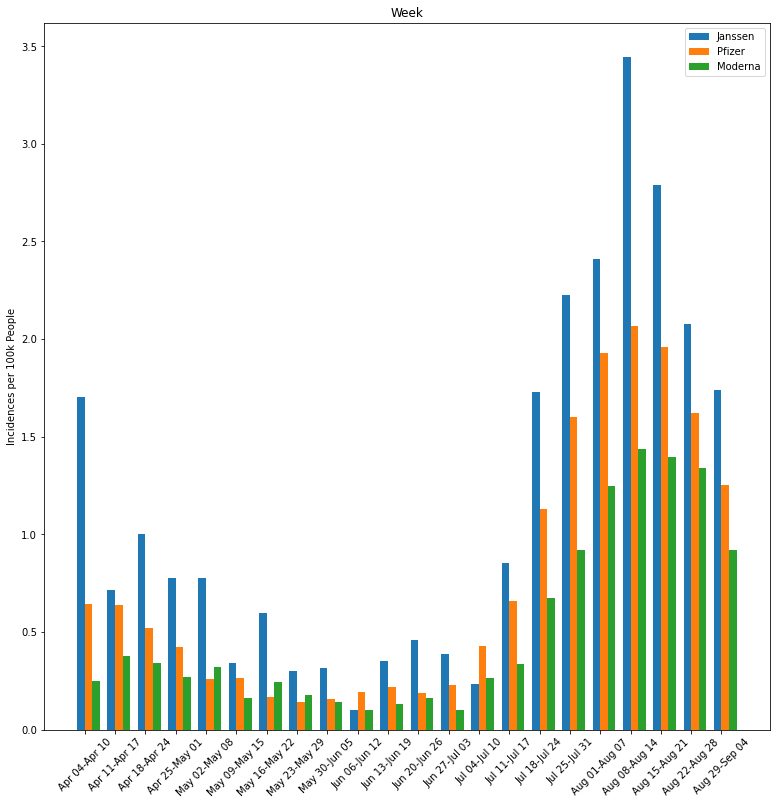

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13,13))


N = len(vaccinedata['week_date'].unique())

ind = np.arange(N)  
width = 0.25

janssenbars = ax.bar(ind, janssen['crude_vax_ir'], width)
pfizerbars = ax.bar(ind+width, pfizer['crude_vax_ir'], width)
modernabars = ax.bar(ind+2*width, moderna['crude_vax_ir'], width)

# add some
ax.set_ylabel('Incidences per 100k People')
ax.set_title('Week')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(vaccinedata['week_date'].unique())

ax.legend( (janssenbars[0], pfizerbars[0], modernabars[0]), ('Janssen', 'Pfizer', 'Moderna') )
plt.xticks(rotation = 45) 

# ax.bar(janssen['week_date'], janssen['crude_vax_ir'])
# ax.bar(pfizer['week_date'], pfizer['crude_vax_ir'])
# ax.bar(moderna['week_date'], moderna['crude_vax_ir'])
plt.show()

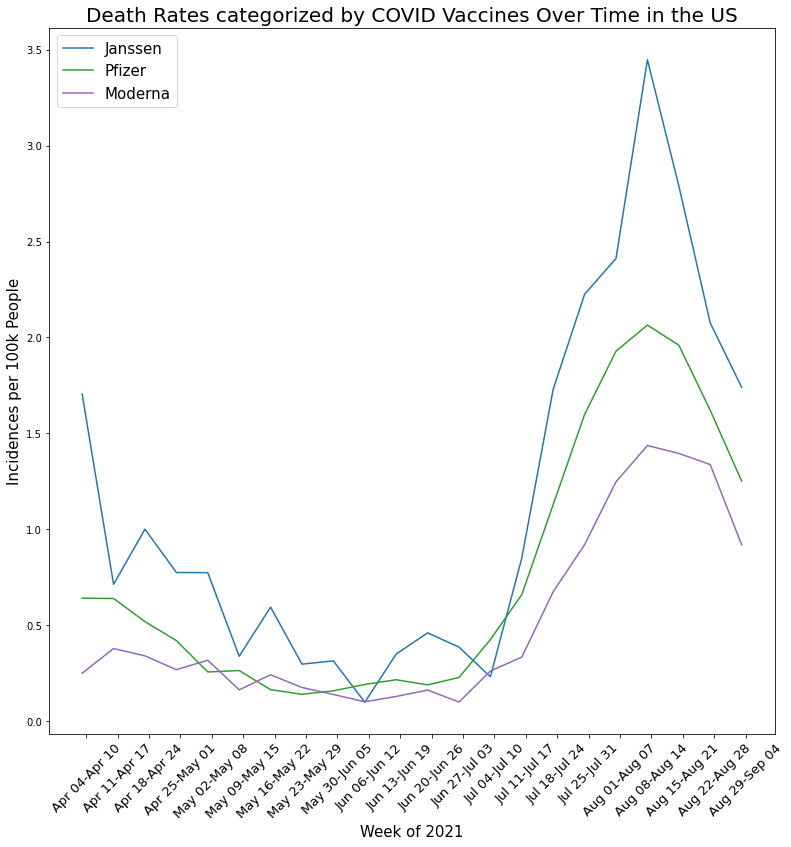

In [9]:
fig1, ax1 = plt.subplots(1, 1, figsize=(13,13))


N = len(vaccinedata['week_date'].unique())

ind = np.arange(N)  
width = 0.25

janssenplot = ax1.plot(ind, janssen['crude_vax_ir'], width)
pfizerplot = ax1.plot(ind, pfizer['crude_vax_ir'], width)
modernaplot = ax1.plot(ind, moderna['crude_vax_ir'], width)

# add some
ax1.set_ylabel('Incidences per 100k People', fontsize = 15)
ax1.set_xlabel('Week of 2021', fontsize = 15)
ax1.set_title('Death Rates categorized by COVID Vaccines Over Time in the US', fontsize = 20) 
ax1.set_xticks(ind + width/2)
ax1.set_xticklabels(vaccinedata['week_date'].unique(), fontsize = 13)
#ax1.set_yticklabels(np.arange(0,5,0.5),fontsize=13)
plt.xticks(rotation = 45) 
ax1.legend([janssenplot[0], pfizerplot[0], modernaplot[0]], ['Janssen', 'Pfizer', 'Moderna'], fontsize = 15)

plt.show()

In [10]:
deathsbyage = deathsbyage.reset_index(drop=True)
deathsbyage

,outcome,month,mmwr_week,week_date,age_group,vaccine_product,crude_vax_ir,crude_unvax_ir,crude_irr,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr
0,death,04 - APR,14,Apr 04-Apr 10,12-17,all_types,0.000000,0.027533,NaN,NaN,NaN,NaN
1,death,04 - APR,14,Apr 04-Apr 10,18-29,all_types,0.000000,0.120537,NaN,NaN,NaN,NaN
2,death,04 - APR,14,Apr 04-Apr 10,30-49,all_types,0.037839,0.575598,15.211755,NaN,NaN,NaN
3,death,04 - APR,14,Apr 04-Apr 10,50-64,all_types,0.258194,2.653614,10.277589,NaN,NaN,NaN
4,death,04 - APR,14,Apr 04-Apr 10,65-79,all_types,0.589517,9.412042,15.965697,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
127,death,09 - SEP,35,Aug 29-Sep 04,18-29,all_types,0.014941,0.472142,31.600086,NaN,NaN,NaN
128,death,09 - SEP,35,Aug 29-Sep 04,30-49,all_types,0.075200,2.669165,35.494153,NaN,NaN,NaN
129,death,09 - SEP,35,Aug 29-Sep 04,50-64,all_types,0.526543,11.332073,21.521644,NaN,NaN,NaN
130,death,09 - SEP,35,Aug 29-Sep 04,65-79,all_types,2.036556,33.835951,16.614299,NaN,NaN,NaN


In [11]:
agegroups = [i for i in deathsbyage['age_group'].unique()]

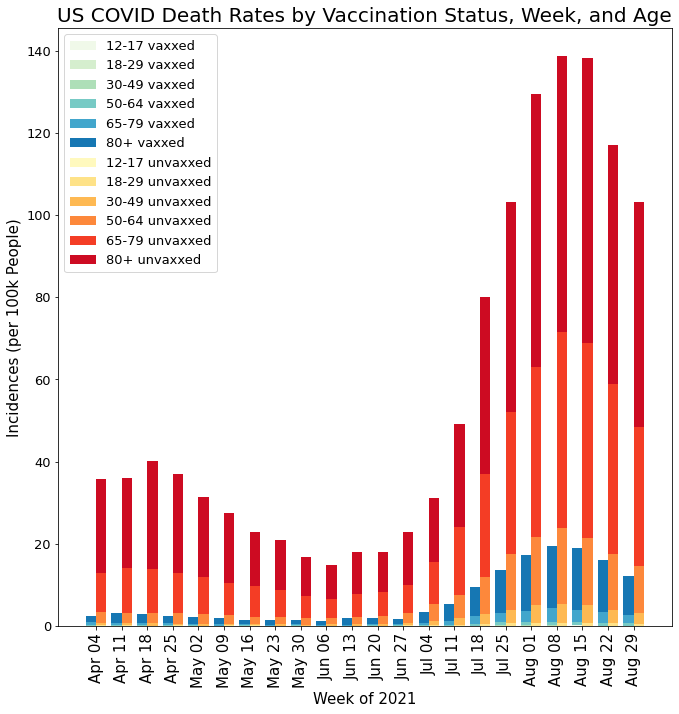

In [85]:
fig2, ax2 = plt.subplots(1, 1, figsize=(11,11))

N = len(vaccinedata['week_date'].unique())

ind = np.arange(N)  
width = 0.4
sumlistvax = np.zeros(N)
sumlistunvax = np.zeros(N)

blues = cm.get_cmap(name='GnBu')
bluecolors = blues(np.arange(0,blues.N)) 
reds = cm.get_cmap(name='YlOrRd')
redcolors = reds(np.arange(0,reds.N))


for i in range(len(agegroups)):
    agedeathvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_vax_ir'].reset_index(drop=True)
    ax2.bar(ind, agedeathvax, width, bottom = sumlistvax, label = agegroups[i] + " vaxxed", color = bluecolors[10 + 40*i])
    sumlistvax += agedeathvax
    
for i in range(len(agegroups)):
    agedeathunvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_unvax_ir'].reset_index(drop=True)
    ax2.bar(ind+width, agedeathunvax, width, bottom = sumlistunvax, label = agegroups[i] + " unvaxxed", color = redcolors[10 + 40*i])
    sumlistunvax += agedeathunvax

weeks = [i[0:6] for i in vaccinedata['week_date'].unique()]
ax2.set_ylabel('Incidences (per 100k People)', fontsize = 15)
ax2.set_title('US COVID Death Rates by Vaccination Status, Week, and Age', fontsize = 20)
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(weeks, fontsize = 15)
ax2.set_xlabel('Week of 2021', fontsize = 15)


ax2.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.yticks(fontsize=13)
plt.show()

This figure illustrates the death rates (incidents per 100k people) due to COVID from April 4th to September 5th based on vaccination status and age. The data comes from CDC's U.S. COVID Data Tracker (https://covid.cdc.gov/covid-data-tracker/#rates-by-vaccine-status). Incidents of vaccinated people are depicted in blue colors, while incidents of unvaccinated people are depicted in red colors.

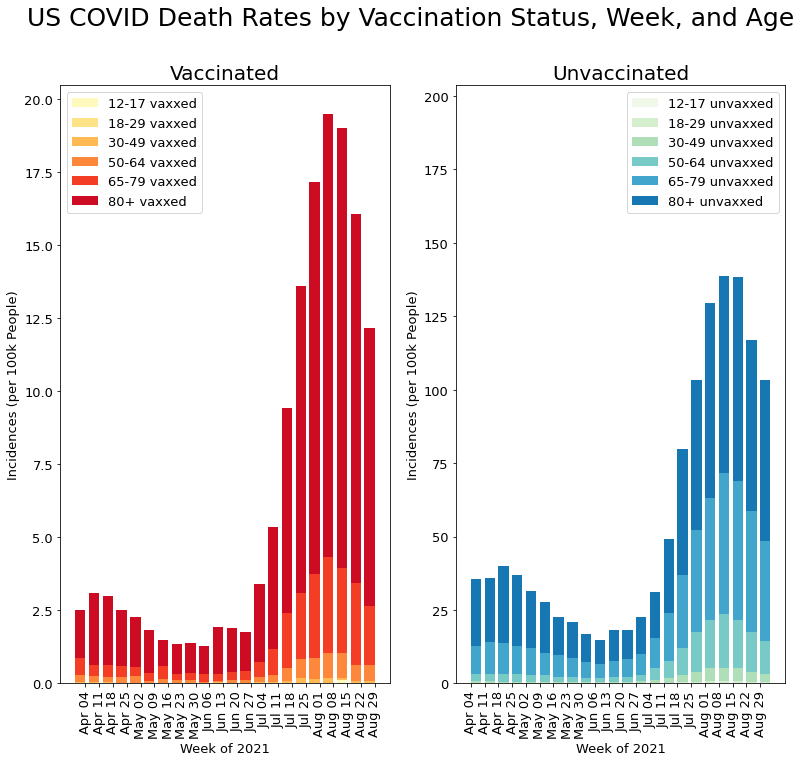

In [81]:
fig4, (ax4, ax41) = plt.subplots(1, 2, figsize=(13,11))

N = len(vaccinedata['week_date'].unique())

ind = np.arange(N)  
width = 0.75
sumlistvax = np.zeros(N)
sumlistunvax = np.zeros(N)

blues = cm.get_cmap(name='GnBu')
bluecolors = blues(np.arange(0,blues.N)) 
reds = cm.get_cmap(name='YlOrRd')
redcolors = reds(np.arange(0,reds.N))


for i in range(len(agegroups)):
    agedeathvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_vax_ir'].reset_index(drop=True)
    ax4.bar(ind, agedeathvax, width, bottom = sumlistvax, label = agegroups[i] + " vaxxed", color = redcolors[10 + 40*i])
    sumlistvax += agedeathvax
    
for i in range(len(agegroups)):
    agedeathunvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_unvax_ir'].reset_index(drop=True)
    ax41.bar(ind+width, agedeathunvax, width, bottom = sumlistunvax, label = agegroups[i] + " unvaxxed", color = bluecolors[10 + 40*i])
    sumlistunvax += agedeathunvax


# ax4.set_ylabel('Incidences per 100k People', fontsize = 13)
# ax4.set_title('Rates of Death to COVID by Age in the USOver Time', fontsize = 20)
# ax4.set_xticks(ind + width / 2)
# ax4.set_xticklabels(vaccinedata['week_date'].unique(), fontsize = 13)


#plt.xticks(rotation = 45)
axtitles = ['Vaccinated', 'Unvaccinated']
weeks = [i[0:6] for i in vaccinedata['week_date'].unique()]

axnum = 0
for ax in fig4.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_ylabel('Incidences (per 100k People)', fontsize = 13)
    ax.set_xlabel('Week of 2021', fontsize = 13)
    ax.set_title(axtitles[axnum], fontsize = 20)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(weeks, fontsize = 13)
    plt.yticks(fontsize=13)
    ax.legend(fontsize = 13)
    if axnum==1:
        ax.set_ylim(0,203.5)
    axnum+=1
fig4.suptitle('US COVID Death Rates by Vaccination Status, Week, and Age', fontsize = 25)
plt.show()



This figure illustrates the death rates (incidents per 100k people) due to COVID from April 4th to September 5th based on vaccination status and age. The data comes from CDC's U.S. COVID Data Tracker (https://covid.cdc.gov/covid-data-tracker/#rates-by-vaccine-status). Incidents of vaccinated people are depicted in red colors, while incidents of unvaccinated people are depicted in blue colors.

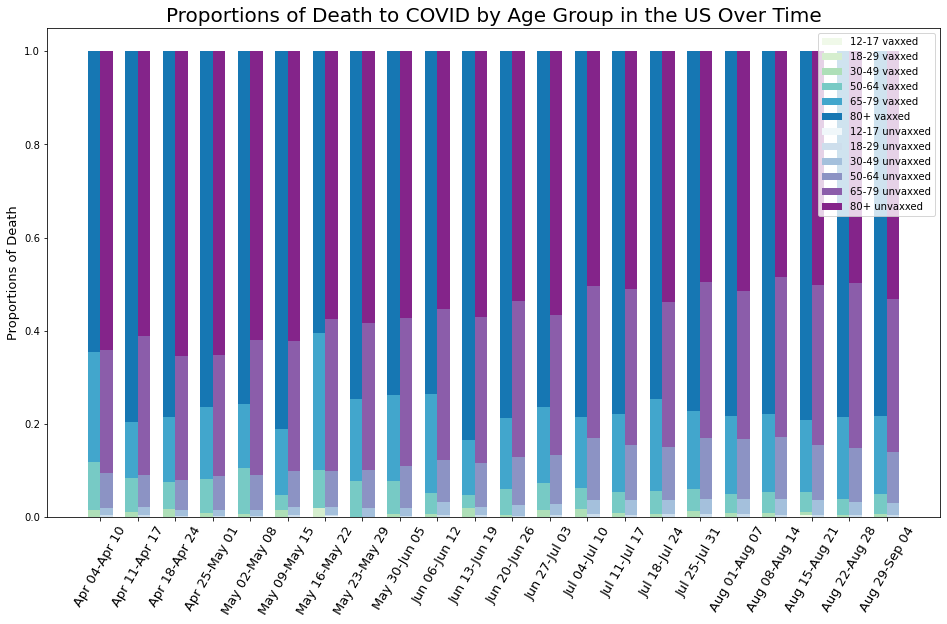

In [82]:
fig3, ax3 = plt.subplots(1, 1, figsize=(16,9))

N = len(vaccinedata['week_date'].unique())

ind = np.arange(N)  
width = 0.4
sumlistvax = np.zeros(N)
sumlistunvax = np.zeros(N)

blues = cm.get_cmap(name='GnBu')
bluecolors = blues(np.arange(0,blues.N)) 
reds = cm.get_cmap(name='BuPu')
redcolors = reds(np.arange(0,reds.N)) 

# Count the deaths per age group and total them
for i in range(len(agegroups)):
    agedeathvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_vax_ir'].reset_index(drop=True)
    sumlistvax += agedeathvax
    agedeathunvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_unvax_ir'].reset_index(drop=True)
    sumlistunvax += agedeathunvax

proplistvax = np.zeros(N)
proplistunvax = np.zeros(N)
for i in range(len(agegroups)):
    agedeathvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_vax_ir'].reset_index(drop=True)
    ax3.bar(1.2*ind, agedeathvax/sumlistvax, width, bottom = proplistvax, label = agegroups[i] + " vaxxed", color = bluecolors[10 + 40*i])
    proplistvax += agedeathvax/sumlistvax

for i in range(len(agegroups)):
    agedeathunvax = deathsbyage[deathsbyage['age_group']==agegroups[i]]['crude_unvax_ir'].reset_index(drop=True)
    ax3.bar(1.2*ind+width, agedeathunvax/sumlistunvax, width, bottom = proplistunvax, label = agegroups[i] + " unvaxxed", color = redcolors[10 + 40*i])
    proplistunvax += agedeathunvax/sumlistunvax
    
ax3.set_ylabel('Proportions of Death', fontsize = 13)
ax3.set_title('Proportions of Death to COVID by Age Group in the US Over Time', fontsize = 20)
ax3.set_xticks(1.2*ind + width / 2)
ax3.set_xticklabels(vaccinedata['week_date'].unique(), fontsize = 13)

ax3.legend()
plt.xticks(rotation = 60) 
plt.show()